In [1]:
# pip install missingno

# Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as miss
import numpy as np
import random
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, KFold

## Loading data into pandas 

In [3]:
df=pd.read_csv('data.data', header=None)
print ('Total number of data-points '+str(df.shape[0]))

Total number of data-points 690


# Pre-processing data

Adding an additional column to classify each data as Granted-credit ('1') or denied credit ('0')


In [4]:
le = preprocessing.LabelEncoder()
lis=np.logical_not(le.fit_transform(df.iloc[:,15])).astype(int)
df['Class']=pd.Series(lis)
df=df.drop([15], axis=1)
df.columns=['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','A15','Class']
df.head(5) #showing first 5 datapoints

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,Class
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,1


In [5]:
def perc_show(ax,df):
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height+0 ,
                '{:1.1f}%'.format(height/len(df)*100),
                ha="center", fontsize=12) 

posx and posy should be finite values
posx and posy should be finite values


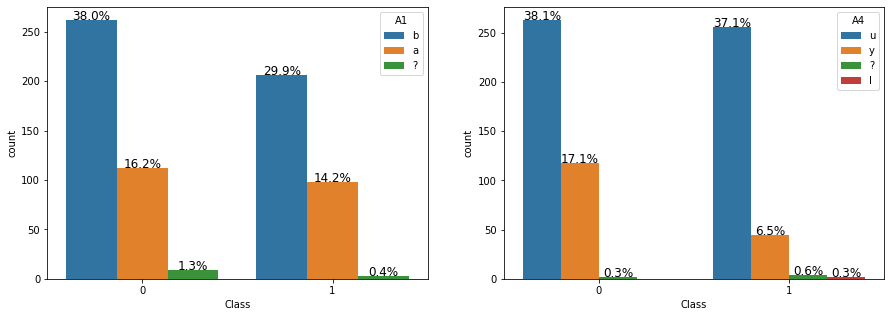

In [6]:
fig, axarr = plt.subplots(1, 2, figsize=(15,5))
ax = sns.countplot(x="Class", hue="A1", data=df, ax=axarr[0])
perc_show(ax,df);
ax = sns.countplot(x="Class", hue="A4", data=df, ax=axarr[1])
perc_show(ax,df);

1. From above graphs we can say for categorical variables A1 and A4 we have two (2) and three(3) unique values (other than the missing values) which are distributed amongst Class '0' and '1' as shown above.
2. It can be inferred category 'b' in feature A1 and category 'u' in feature A4 are most dominant.
3. As attributes and values are changed to meaningless values we cannot be sure what these features and values are representing about the dataset.

In [7]:
df['A14'].describe()

count       690
unique      171
top       00000
freq        132
Name: A14, dtype: object

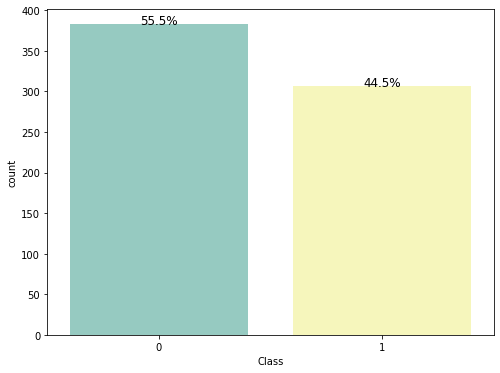

In [8]:
#below plot show distribution of True and False classes
# It can be seen data is almost equally distributed amongst these classes.
plt.figure(figsize=(8,6))
ax = sns.countplot(x = 'Class',data = df, palette="Set3")
perc_show(ax,df)

## Missing data-visualization
1. Replacing '?' in dataset to NaN
2. Annalyzing dataset using missingno library
3. Visualizing reults and extracting usefull information

In [9]:
# Before moving further let us do some research on missing values (if any)
random.seed(10)
df=df.replace('?', np.nan); # replacing all missing values with nan for visualizationa
df.isnull().mean()*100


A1       1.739130
A2       1.739130
A3       0.000000
A4       0.869565
A5       0.869565
A6       1.304348
A7       1.304348
A8       0.000000
A9       0.000000
A10      0.000000
A11      0.000000
A12      0.000000
A13      0.000000
A14      1.884058
A15      0.000000
Class    0.000000
dtype: float64

Above stats shows percentage of data missing in each feature/column

C:\Users\17149\Anaconda3\lib\site-packages\missingno\missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  "Plotting a sparkline on an existing axis is not currently supported. "


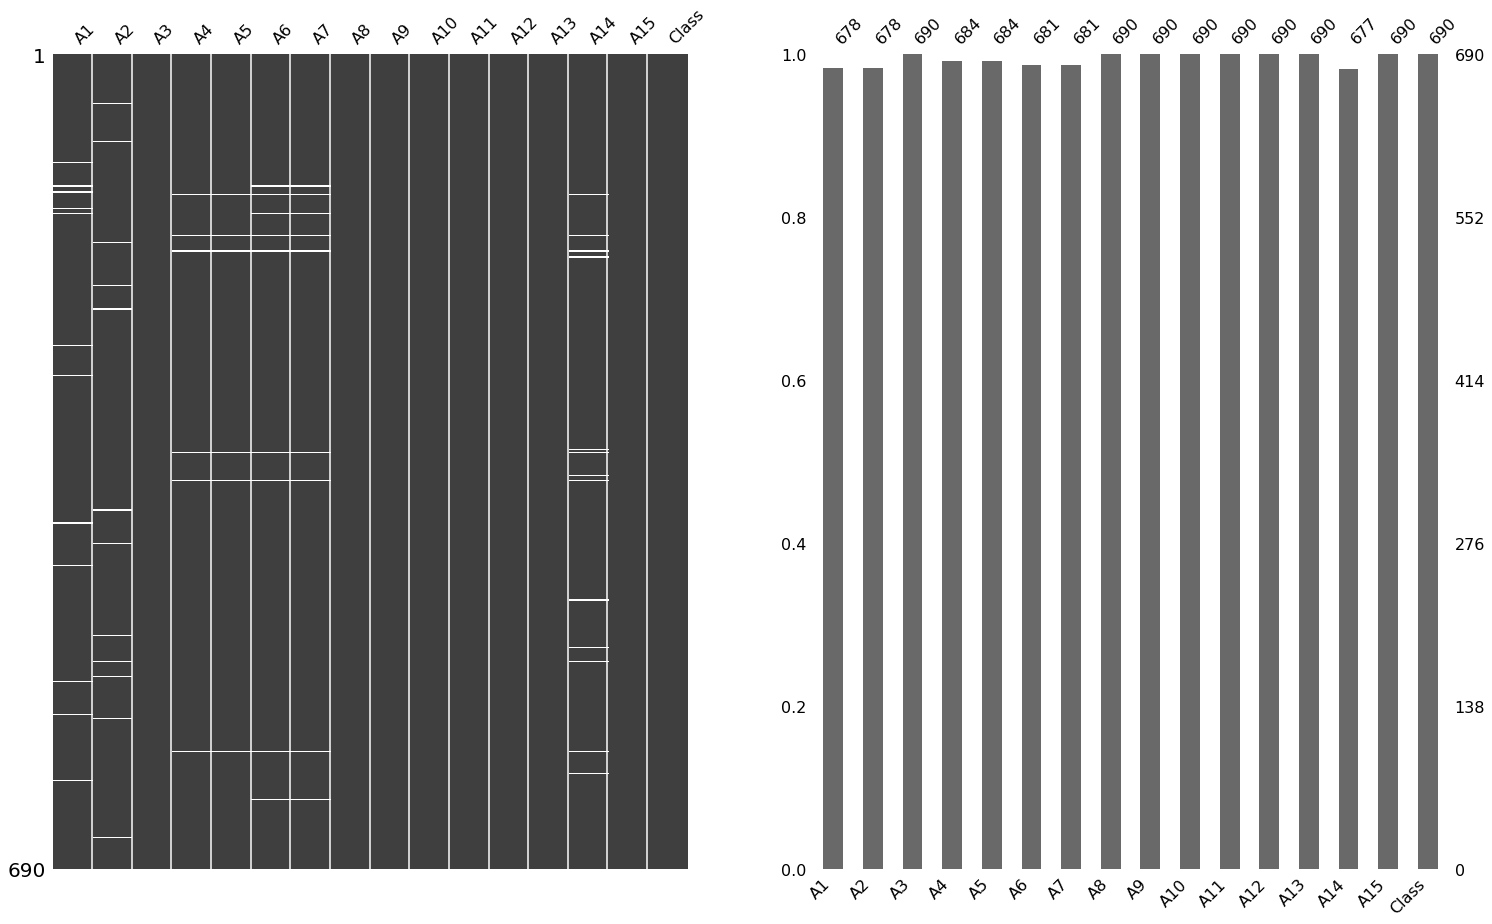

In [10]:
df=df.iloc[list(np.random.permutation(df.shape[0])),:] #just random mixing of original dataset
fig, axarr = plt.subplots(1, 2, figsize=(25,15))
miss.matrix(df, ax=axarr[0]);
miss.bar(df, ax=axarr[1]);

1. Garph on the left shows missing values as blank (white dashes). For example feature A2 (column 1) has 12 white dashes thus representing 12 missing values. Also, we can visualize most of the missing values in A4,A5,A6,A7 are highly corelated which means if one of these value/s are missing there is almost 100% certainity that values in other columns (A4,A5,A6,A7) are also missing.
2. Graph on right shows missing values in each columns/feature.

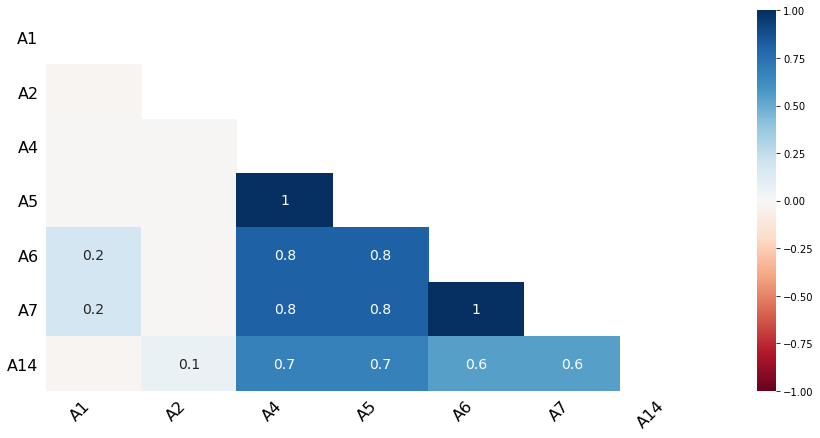

In [11]:
miss.heatmap(df,figsize=(15,7));

Our initial observation holds true, we can see strong correlations between missing values of different features especially between (A4,A5,A6,A7 and A14).  

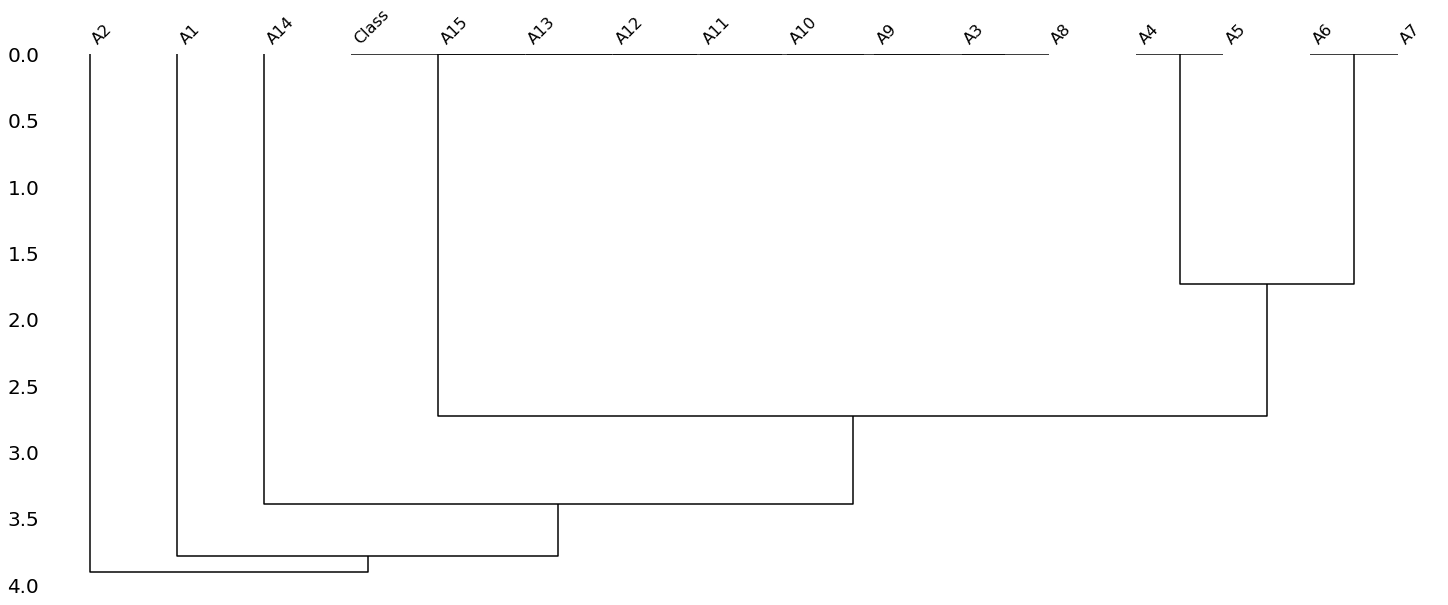

In [12]:
miss.dendrogram(df)

The dendogram tries to find correleation between features and group them interms of similarity. This means two or more variables grouped/clustered at a small distances (or zero distance) are highly correleated. This might help us to predict a  missing value in one variable if the other variable/feature has a non-null value. From above we can observed cluster consisting of (A4,A5) and (A6,A7) are closely linked to each other.

Before proceeding to handle missing values. Let's get all data records with NaN for column A1

In [13]:
df_new=df.loc[df['A1'].isnull(),:] 
df_new.shape[0]
# as it can be seen intotal 12 NaN values for A1 columns. This is exactly shown by above graphs

12

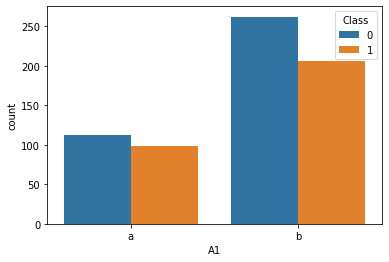

In [14]:
sns.countplot(x='A1',data=df,hue='Class')
# In below barplot we can see that the distribution of class 0 and 1 is consistent between category 'b' and category 'a'
# of feature A1

In [15]:
df_new2=df.loc[df['A2'].isnull(),:]
df_new2.shape[0]
# As it can be seen intotal 12 NaN values for A2 columns. This is exactly shown by above graphs

12

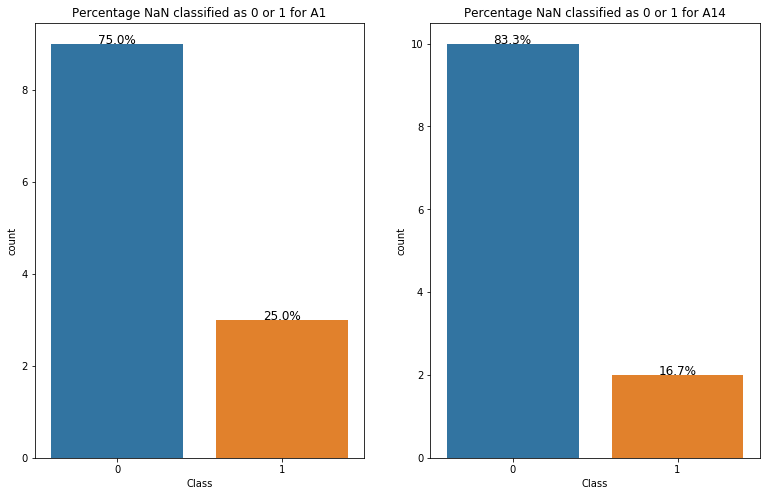

In [16]:

fig, axarr = plt.subplots(1, 2, figsize=(13,8))
axarr[0].set_title('Percentage NaN classified as 0 or 1 for A1')
ax = sns.countplot(x = 'Class',data = df_new,ax=axarr[0])
perc_show(ax,df_new)
axarr[1].set_title('Percentage NaN classified as 0 or 1 for A14')
ax = sns.countplot(x = 'Class',data = df_new2,ax=axarr[1])
perc_show(ax,df_new)

In above graphs we can see there is a strong correlation between missing values in column A1,A14 and Class. There is a high probability if the value of A1 or A14 is missing the credit will be denied i.e Class '0'

In [17]:
df_copy=df.copy()

df_copy['A1_null']=np.where(df_copy['A1'].isnull(),1,0)
df_copy.groupby(['Class'])['A1_null'].mean()*100

Class
0    2.349869
1    0.977199
Name: A1_null, dtype: float64

Above data shows only 2% values for Class 0 and less than 1% for Class 1 is missing.

# Handling missing values
1. We have two different data-types in given dataset i) Nominal ii) Continuous. Therefore, these two data-types will be dealt seperately.
2. For continuous data-type features (A2 and A14 we will impute missing values with median value of that particular feature
3. For Nominal data-type features (A1,A4,A5,A6,A7,A14) we can use clustering techniques to replace missing values in respective columns/feature
4. Before Imputation we need to split data into train/test to avoid 'information leakage'.



In [18]:
df['A2']=df['A2'].astype(float);
df['A11']=df['A11'].astype(float);
df['A14']=df['A14'].astype(float);
df['A15']=df['A15'].astype(float);


Replacing NaN values for categorical variables to the mode of that feature


In [19]:
df['A1'].fillna(df['A1'].mode()[0], inplace=True)
df['A4'].fillna(df['A4'].mode()[0], inplace=True)
df['A5'].fillna(df['A5'].mode()[0], inplace=True)
df['A6'].fillna(df['A6'].mode()[0], inplace=True)
df['A7'].fillna(df['A7'].mode()[0], inplace=True)
df.isnull().sum() # As we can see all NaN values in categorical variables are replaced with its Mode.

A1        0
A2       12
A3        0
A4        0
A5        0
A6        0
A7        0
A8        0
A9        0
A10       0
A11       0
A12       0
A13       0
A14      13
A15       0
Class     0
dtype: int64

In [20]:
# randomly splitting original data frame into df_train and df_test with 80/20 split ratio
np.random.seed(4)
dummy=list(np.random.permutation(df.shape[0]));
split=int(np.floor(0.8*len(dummy)))
print(split)
df_train=df.iloc[dummy[0:split],:]
df_test=df.iloc[dummy[split:],:]
# X=
# y=df.iloc[:,-1].values
print('Training data-set %: '+ str((df_train.shape[0]*100)/df.shape[0]))
print('Test data-set %: '+ str((df_test.shape[0]*100)/df.shape[0]))

#splitting dataset into independent and dependednt variables, Class is a dependednt variable
X_train=df_train.iloc[:,:-1].values
y_train=df_train.iloc[:,-1].values
X_test=df_test.iloc[:,:-1].values
y_test=df_test.iloc[:,-1].values

# Let's do imputation for continuous variables i.e A2 and A14

from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')
X_train[:,[1,13]]=imputer.fit_transform(X_train[:,[1,13]])
X_test[:,[1,13]]=imputer.transform(X_test[:,[1,13]])


552
Training data-set %: 80.0
Test data-set %: 20.0


In [21]:
a=pd.DataFrame(X_test)
print ('There are ' + str((a[1].isnull().sum()) + a[13].isnull().sum()) + ' Null values in Test data-set for A2 and A14')
a2=pd.DataFrame(X_train)
print ('There are ' + str(a2[1].isnull().sum() + a2[13].isnull().sum()) + ' Null values in Train data-set for A2 and A14')
       

There are 0 Null values in Test data-set for A2 and A14
There are 0 Null values in Train data-set for A2 and A14


In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct= ColumnTransformer(transformers=[('encoder', OneHotEncoder(drop='first', sparse=False), [0,3,4,5,6,8,9,11,12])],remainder= 'passthrough')
X_train_transformed=ct.fit_transform (X_train)
X_test_transformed=ct.transform(X_test)


In [23]:
y_train.shape

(552,)

In [24]:
X_train.shape

(552, 15)

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_transformed = sc.fit_transform(X_train_transformed)
X_test_transformed = sc.transform(X_test_transformed)


In [26]:
Log_reg=LogisticRegression(random_state = 0)
Log_reg.fit(X_train_transformed, y_train)

LogisticRegression(random_state=0)

In [27]:
y_pred = Log_reg.predict(X_test_transformed)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [57]:
def plot_performance (y_pred):
    cm_matrix = cm(y_test, y_pred,labels=[0,1])
    plt.figure(figsize=(6,4))
    # ax= plt.subplot()
    ax=sns.heatmap(cm_matrix, annot=True); 
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Class 0', 'Class 1']); ax.yaxis.set_ticklabels(['Class 0', 'Class 1']);
    tp,fn,fp,tn=cm_matrix.ravel()
    # consedring Class 0 as positive class i.e our goal is to identify fraud cases (Case 0).We will find out precision and recall
    print("The accuracy score for Logistic regression is: "+str(100*accuracy_score(y_test, y_pred)))
    print("The Precision for Logistic regression is: "+str(100*(tp/(tp+fp))))
    print("The Recall score for Logistic regression is: "+str(100*(tp/(tp+fn))))
# THe above figures for accuracy, precision and recall are our base-case before doing Grid search for best parameters

The accuracy score for Logistic regression is: 84.05797101449275
The Precision for Logistic regression is: 83.11688311688312
The Recall score for Logistic regression is: 87.67123287671232


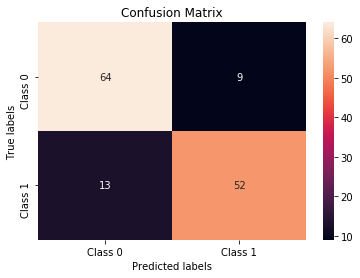

In [58]:
plot_performance(y_pred)

In [97]:
df.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14', 'A15', 'Class'],
      dtype='object')

In [98]:
for a in df.columns:
    print(a)

A1
A2
A3
A4
A5
A6
A7
A8
A9
A10
A11
A12
A13
A14
A15
Class


In [50]:
param={'class_weight':['balanced',None],'penalty':['l2','l1'],'solver':['liblinear']}

grid_log_regression=GridSearchCV(Log_reg,param_grid=param,scoring='accuracy',cv=4)
grid_log_regression.fit(X_train_transformed,y_train)

GridSearchCV(cv=4, estimator=LogisticRegression(random_state=0),
             param_grid={'class_weight': ['balanced', None],
                         'penalty': ['l2', 'l1'], 'solver': ['liblinear']},
             scoring='accuracy')

The best score for accuracy using Grid search for training cross-validation set is 87.31884057971014
The best parameters for accuracy are{'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
The accuracy score for Logistic regression is: 84.78260869565217
The Precision for Logistic regression is: 85.13513513513513
The Recall score for Logistic regression is: 86.3013698630137


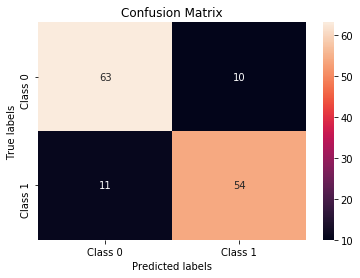

In [67]:
print('The best score for accuracy using Grid search for training cross-validation set is '+ str(grid_log_regression.best_score_*100))
print('The best parameters for accuracy are'+ str(grid_log_regression.best_params_))
y_pred2=grid_log_regression.predict(X_test_transformed) #using best model obtained from grid search to predict test data
plot_performance(y_pred2)

It can be inferred change of class weights from None to balanced and solver to liblinear from default solver lbfgs has improved both accuracy and precision. However, a slight reduction in recall score is observed

In [68]:
!jupyter nbconvert Analysis_v_1.ipynb --to html

[NbConvertApp] Converting notebook Analysis_v_1.ipynb to html
[NbConvertApp] Writing 503102 bytes to Analysis_v_1.html


In [69]:
import datetime

In [70]:
today=datetime.datetime.today()

In [96]:
aa=pd.DataFrame([today-datetime.timedelta(x) for x in range(0,11)])
aa.columns=['date']
aa['date'].dt.month


0     2
1     2
2     2
3     2
4     1
5     1
6     1
7     1
8     1
9     1
10    1
Name: date, dtype: int64